# Regresión Discontinua

En ocasiones, para asignar individuos a un tratamiento se define: $(i)$ un puntaje o **variable continua** y un $(ii)$ valor arbitrario o **punto de corte**. El punto de corte genera una discontinuidad en la probabilidad de participar de un tratamiento. El método de regresión discontinua (RD) explota de manera precisa este tipo de reglas de asignación.

Existen dos tipos de discontinuidades:

1. **Discontinuidad Nítida**: Se presenta cuando todos los individuos a partir del punto de corte son efectivamente tratados.

2. **Discontinuidad Borrosa**: Se presenta cuando a partir del punto de corte existe una fracción positiva de individuos tratados y no tratados. Es decir, si no todos elegibles a ser tratados son efectivamente tratados.

Veremos que en el caso de regresión discontinua borrosa, el método de estimación se puede interpretar como un caso particular de variables instrumentales (IV). 

## Regresión Discontinua Nítida

Suponga que la variable binaria $D_i$ identifica los individuos asignados a un tratamiento a partir de la siguiente regla:

\begin{equation*}
D_i =
    \left\{\begin{array}{lr}
    1 & \text{ si } x_i \geq c \\
    0 & \text{ si } x_i < c
    \end{array}\right.
\end{equation*}

Donde:
- $x_i$ es el valor de la variable continua $X$ (o *running variable*) para el individuo $i$, y 
- $c$ es valor que determina si el individuo es o no tratado (es decir, el *punto de corte o cutoff*). 

Para estimar el efecto del tratamiento sobre una variable de resultado $y_i$, podemos usar el modelo de resultados potenciales. En particular, sea

$$y_i(0) = \alpha + \beta x_i $$
$$y_i(1) = y_i(0) + \tau $$

Note que estamos suponiendo que el efecto del tratamiento es identico para todos los individuos (es decir, suponemos *homogeneidad del efecto*).

Recuerde que el problema de causalidad (o *observability problem*) implica que: 

\begin{align*}
y_i & = y_i(1) \cdot D_i + y_i(0) \cdot (1 - D_i)\\
& = y_i(0) + (y_i(1) - y_i(0)) \cdot D_i\\
\end{align*}

De esta manera, para estimar el impacto usamos la siguiente ecuación: 

$$y_i = \alpha + \beta x_i + \tau D_i + \varepsilon_i$$

El **efecto del tratamiento** se puede estimar en **función del puntaje de corte** a partir de la siguiente ecuación:

\begin{align*}
\tau(c) & = \lim_{x \downarrow c} E(y_i(1) | x_i = x) - \lim_{x \uparrow c} E(y_i(0) | x_i = x) \\
& = \lim_{x \downarrow c} E(y_i | x_i = x) - \lim_{x \uparrow c} E(y_i | x_i = x) \\
\end{align*}
$$$$

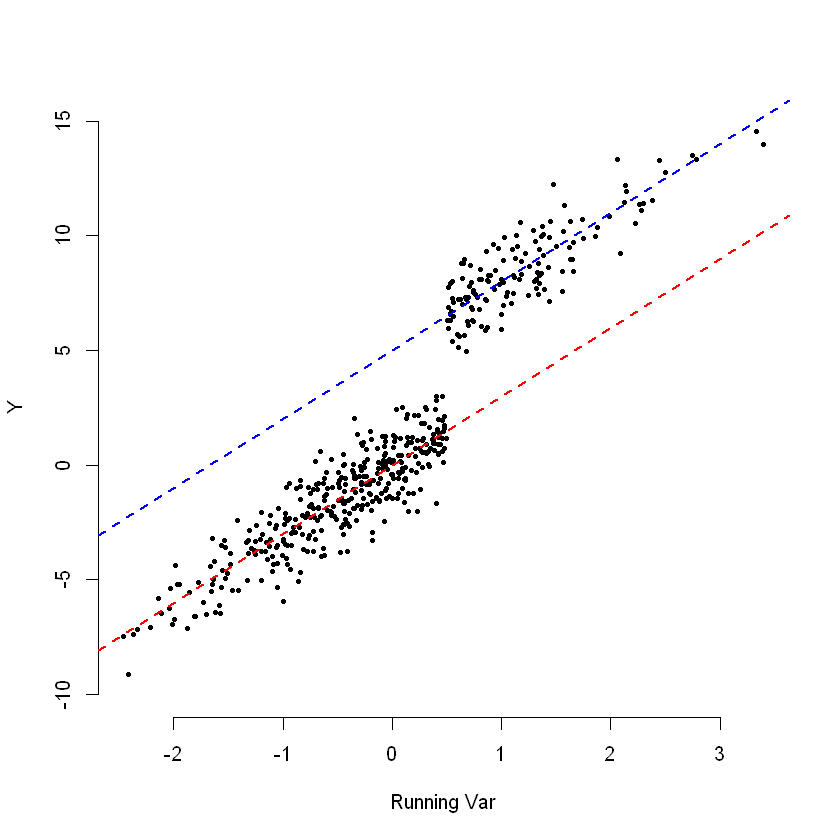

In [1]:
#Simular datos
set.seed(11102025)
x = rnorm(500, 0, 1); D = I(x >= 0.5)
e = rnorm(500, 0, 1)
tau = 5 #Efecto del tratamiento

y1 = 3*x + tau*D + e 
plot(x, y1, ylim = c(-10, 15), pch = 19, cex = 0.6, frame = FALSE, xlab = 'Running Var', ylab = 'Y')
abline(0, 3, col = "red", lty = 2, lwd = 2); abline(tau, 3, col = "blue", lty = 2, lwd = 2) #Esperanza condicional

## Problemas de Especificación 

Observe que a diferencia de las regresiones que hemos estudiado hasta ahora, $x_i$ no solo es una covariable sino que determina cuales individuos son tratados. La metodología de regresión dicontinua captura el efecto del tratamiento distinguiendo la parte no-lineal y discontinua, $D_i = 1(x_i \geq c)$, de la parte continua, $x_i$.

Sin embargo, es posible que exista una relación no-lineal entre $x_i$ y $y_i$. Es decir, es posible que 

$$y_i(0) = f(x_i)$$

Luego, una alternativa es estimar la ecuación:

$$y_i = f(x_i) + \tau D_i + \varepsilon_i$$

Una forma de aproximar $f(\cdot)$ es a través de un polinomio (global) de grado $k$ . Es decir, se puede estimar:

$$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + ... + \beta_k x_i^k + \tau D_i + \varepsilon_i$$

[Imbens y Lemieux (2008, JE)](https://doi.org/10.1016/j.jeconom.2007.05.001) sugieren usar polinomios de diferentes grados como una forma de evaluar la sensibilidad de los resultados (es decir, como un ejercicio de robustez). A continuación veremos por qué.

Como señalan Angrist y Pischke (2009), **la validez de las estimaciones** del efecto causal **dependen de** si el **polinomio** usado provee o no una adecuada descripción de $E(y_i(0) | x_i)$. De lo contrario, lo que se interpreta como un salto debido al tratamiento, pordría ser simplemente un factor de confunsión (o sesgo) por especificar mal (u omitir la relación no-lineal) la esperanza condicional del contrafactual.

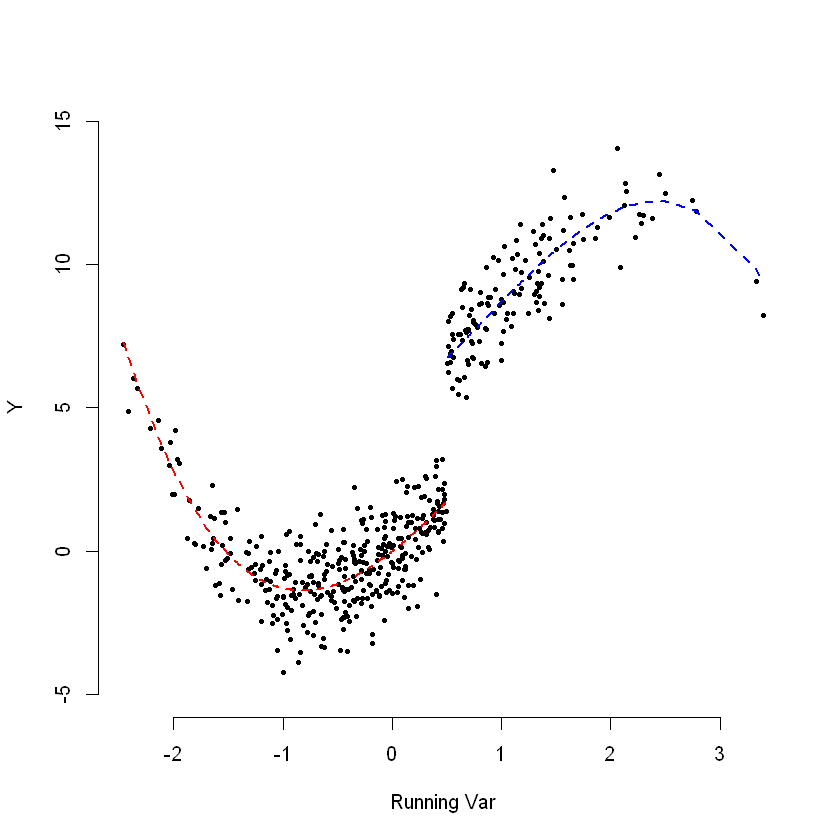

In [8]:
#Relacion no-lineal
y2 = 3*x + 1.2*x^2 - 0.5*x^3 + tau*D + e
x0 = x[x<0.5]; fit0 = 3*x0 + 1.2*x0^2 - 0.5*x0^3
x1 = x[x>=0.5]; fit1 = 3*x1 + 1.2*x1^2 - 0.5*x1^3 + tau 

plot(x, y2, ylim = c(-5, 15), pch = 19, cex = 0.6, frame = FALSE, xlab = 'Running Var', ylab = 'Y')
lines(x0[order(x0)], fit0[order(x0)], col = "red", lty = 2, lwd = 2); lines(x1[order(x1)], fit1[order(x1)], col = "blue", lty = 2, lwd = 2)

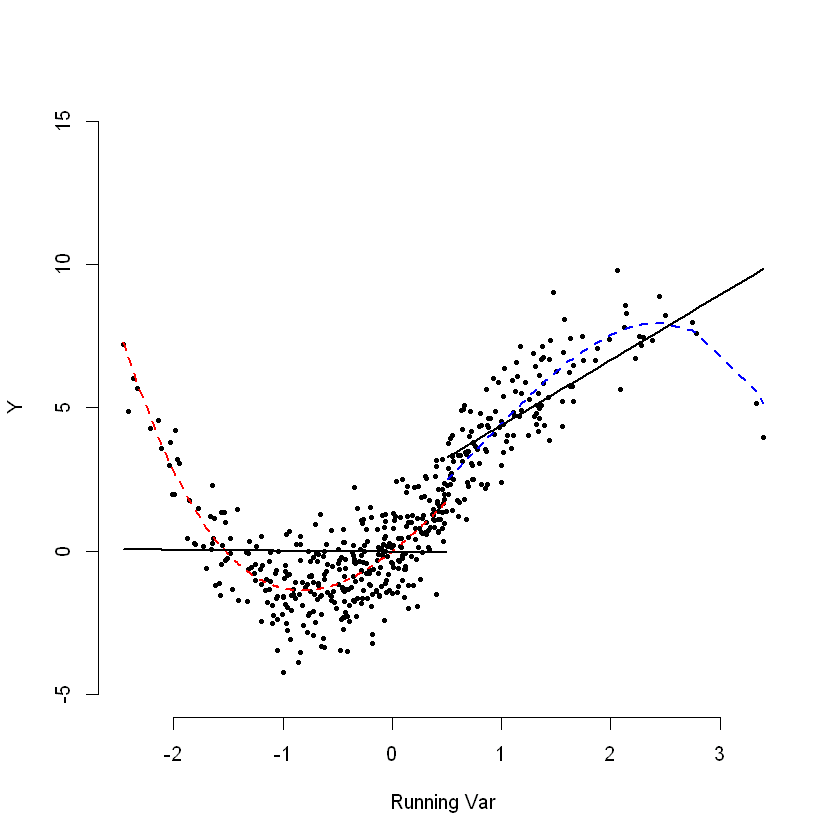

In [11]:
#Relacion no-lineal vs lineal
y3 = 3*x + 1.2*x^2 - 0.5*x^3 + 0.15*tau*D + e
fit0 = 3*x0 + 1.2*x0^2 - 0.5*x0^3; lfit0 = -0.02658 + -0.03562*x0
fit1 = 3*x1 + 1.2*x1^2 - 0.5*x1^3 + 0.15*tau; lfit1 = 2.128 + 2.272*x1 

plot(x, y3, ylim = c(-5, 15), pch = 19, cex = 0.6, frame = FALSE, xlab = 'Running Var', ylab = 'Y')
lines(x0[order(x0)], fit0[order(x0)], col = "red", lty = 2, lwd = 2); lines(x1[order(x1)], fit1[order(x1)], col = "blue", lty = 2, lwd = 2)
lines(x0[order(x0)], lfit0[order(x0)], col = "black", lty = 1, lwd = 2); lines(x1[order(x1)], lfit1[order(x1)], col = "black", lty = 1, lwd = 2)

## Estimación No Paramétrica

Para reducir la posibilidad de cometer errores, **se considera unicamente los datos de individuos alrededor del punto de corte**, es decir, se define una vecindad $[c - \Delta, c + \Delta]$ donde $\Delta$ es un valor positivo pequeño, conocido como *bandwidth*. De esta manera, 

$$E(y_i | c - \Delta < x_i < c) \approx E(y_i(0) | x_i = c)$$
$$E(y_i | c \leq x_i < c + \Delta) \approx E(y_i(1) | x_i = c)$$

Finalmente, el **estimador no-paramétrico del efecto causal** esta dado por:

\begin{align*}
\tau(c) & = \lim_{\Delta \to 0} E(y_i | c \leq x_i < c + \Delta) - E(y_i | c - \Delta < x_i < c) \\
& = E(y_i(1)- y_i(0) | x_i = c)
\end{align*}

Es importante notar que:

- **estimar la esperanza** de la variable de resultado, $y_i$, **en intervalos pequeños** del running variable **trae inconvenientes**. En particular, el reducido tamaño de muestra genera baja precisión en las estimaciones (i.e., la varianza de las estimaciones es alta). 


- Por otro lado, es necesario seleccionar el parámetro $\Delta$ de forma que minimize el sesgo por alejarse del punto de corte, pero considerando que para valores pequeños de $\Delta$, la varianza de las estimaciones tiende a crecer (*bias-variance trade off*).

Para solucionar estos problemas se usan métodos no-paramétricos. En particular, se estiman regresiones polinomiales locales ([Hahn, Todd, and van der Klaauw, 2001 ECTA](https://onlinelibrary.wiley.com/doi/abs/10.1111/1468-0262.00183)), metodologías para minimizar MSE a partir de **validación cruzada**, y estimadores que corrigen sesgos de cobertura ([Calonico, Cattaneo, y Titiunik, 2014 ECTA](https://doi.org/10.3982/ECTA11757)).

## Supuestos de Identificación

Antes de realizar cualquier análisis empírico se debe verificar la validez interna de la metodología. Es decir, debemos presentar evidencia de que los diferentes supuestos de identifación del método se cumplen. 

Para el método de regresión discontinua, existen dos supuestos de identificación:

1. **No existe manipulación del puntaje de asignación al tratamiento**. Este supuesto se puede validar estudiando la distribución de la running variable. Si no existen discontinuidades (o *bunching*) en la distribución alrededor del puntaje de corte, se puede concluir que no existe manipulación.


2. **El punto de corte debe ser arbitrario** (o definido de manera aleatoria). Este supuesto se puede validar evaluando si las covariables o características predeterminadas (es decir, la informacion de los individuos previas al tratamiento) son continuas alrededor del punto de corte.

A través de la siguiente aplicación veremos cómo se evalúa la validez de estos supuestos.

## Aplicación 1: 

[Busso, Montaño, y Muñoz (2025, RESTAT)](https://doi.org/10.1162/REST.a.1635) estudian el efecto de obtener la distinción del mejor Saber Pro en los salarios de los egresados de educación superior. 

Los autores estiman la siguiente ecuación:

$$\log(Earnings_{ijt}) = \alpha + \beta Z_{ijt} + \tau D_{ijt} + \delta (Z_{ijt} \times D_{ijt}) + X_i'\gamma + \varepsilon_{ijt}$$

Donde:

- $\log(Earnings_{ijt})$ es el logarítmo natural del primer salario percibido por el individuo $i$ después de graduarse del programa $j$
- $Z_{ijt} = Puntaje_{i} - c_{jt}$ es el puntaje centrado alrededor del valor mínimo para obtener la distinción del mejor Saber Pro en el programa $j$ en el año $t$
- $D_{ijt} = 1(Puntaje_{i} > c_{jt})$ es una variable binaria que indica si el individuo $i$ recibió la distinción del mejor Saber Pro
- $X_i$ es un conjunto de características del individuo, las cuales se observan previo a recibir la distinción (es decir, Saber 11, género, edad, tipo de universidad, etc)


## Validez Interna

**1. Evidencia de No Manipulación**:

Las siguientes gráficas presentan evidencia de que alrededor del punto de corte no existe **bunching** (o discontinuidad) en la distribución del running variable. 

<div style="display: flex; justify-content: center; align-items: flex-start; gap: 1px;">
  <div style="text-align: center;">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 1.</strong> No Bunching (Evidencia Gráfica)
    </div>
    <img src="images/NormalizedDensity.png" alt="Figure 1" width="80%">
  </div>
  <div style="text-align: center;">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 2.</strong> Estimación de Bunching (Evidencia Numérica) 
    </div>
    <img src="images/ManipulationTest.png" alt="Figure 2" width="80%">
  </div>
</div>

**2. Evidencia Cuasi-aleatoridad**:

Las siguentes figuras presentan evidencia de que alrededor del puntaje de corte **no hay discontinuidades en características pre-determinadas**.

<div style="display: flex; justify-content: center; align-items: flex-start; gap: 1px;">
  <div style="text-align: center;">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 1.</strong> Prob. Mujer
    </div>
    <img src="images/RDfemale.png" alt="Figure 1" width="60%">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 2.</strong> Prob. Trabajar 
    </div>
    <img src="images/RDworking.png" alt="Figure 2" width="60%">
  </div>
  <div style="text-align: center;">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 3.</strong> Puntaje del Saber 11
    </div>
    <img src="images/RDsb11score.png" alt="Figure 1" width="60%">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 4.</strong> Puntaje de Inglés - Saber Pro 
    </div>
    <img src="images/RDenglish.png" alt="Figure 2" width="60%">
  </div>    
</div>

## Resultados

La siguiente tabla presenta estimaciones, a partir del método de regresión discontinua, para el efecto de recibir la distinción del mejor Saber Pro.

<div style="display: flex; justify-content: center; align-items: flex-start; gap: 1px;">
  <div style="text-align: center;">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Tabla 1.</strong> Efecto en Salarios de Recibir la Distinción del Mejor Saber Pro 
    </div>
    <img src="images/Tabla1.png" alt="Table1" width="80%">
  </div>
</div>

## Aplicación 2: Violación de Supuestos

[Camacho y Conover (2011, AEJ: Policy)](https://www.aeaweb.org/articles?id=10.1257/pol.3.2.41) documentan la evolución a través del tiempo del puntaje del Sisben, el cual es usado para asignar familias a diferentes programas de política social y salud en Colombia. Los autores documentan manipulación de los resultados, lo cual podría explicarse por razones políticas para influir en elecciones y a publicar el algorítmo de calificación en 1997. 

<div style="display: flex; justify-content: center; align-items: flex-start; gap: 1px;">
  <div style="text-align: center;">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 1.</strong> Distribución Puntaje del Sisben - 1994
    </div>
    <img src="images/Sisben94.png" alt="Figure 1" width="65%">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 3.</strong> Distribución Puntaje del Sisben - 1998
    </div>
    <img src="images/Sisben98.png" alt="Figure 2" width="65%">
  </div>
  <div style="text-align: center;">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 2.</strong> Distribución Puntaje del Sisben - 1997
    </div>
    <img src="images/Sisben97.png" alt="Figure 1" width="65%">
    <div style="font-size: 14px; text-align: center; margin-top: 5px;">
      <strong>Figura 4.</strong> Distribución Puntaje del Sisben - 2003 
    </div>
    <img src="images/Sisben03.png" alt="Figure 2" width="65%">
  </div>    
</div>

## Regresión Discontinua Borrosa

Observe que en regresión discontinua nítida, $P(D_i = 1 | x_i \geq c) = 1$ y $P(D_i = 1 | x_i < c) = 0$. Es decir, todos los individuos elegibles para ser tratados son efectivamente tratados y los no elegibles no reciben tratamiento. 

Sin embargo, lo anterior no ocurre en todos las aplicaciones. Esto es así porque algunos individuos elegibles a recibir tratamiento deciden no formar parte del tratamiento. Más aún, es posible que individuos no elegibles logren recibir tratamiento. El método de **regresión discontinua borrosa** estima el efecto del tratamiento controlando por la falta de cumplimiento (*lack of compliance*) de la regla de asignación. En particular, se explota el hecho de que


\begin{equation*}
Pr(D_i = 1 | x_i) =
    \left\{\begin{array}{lr}
    g_1(x_i) & \text{ si } x_i \geq c \\
    g_0(x_i) & \text{ si } x_i < c
    \end{array}\right.
    \quad \text{ donde }\hspace{5pt} g_1(c) \neq g_0(c)
\end{equation*}

Sin perdida de generalidad, asumimos que $g_1(c) > g_0(c)$, es decir, que la probabilidad de recibir tratamiento aumenta cuando $x_i \geq c$.

La relación entre la probabilidad de recibir tratamiento y $x_i$ se puede escribir como:

$$E(D_i | x_i) = Pr(D_i = 1 | x_i) = g_0(x_i) + (g_1(x_i) - g_0(x_i)) \cdot T_i$$

donde 

$$T_i = 1(x_i \geq c)$$

Es decir, $T_i$ es una variable binaria que indica el punto en el que la esperanza condicional $E(D_i | x_i)$ salta de manera discontinua.

Para estimar el efecto del tratamiento $D_i$ (LATE) sobre la variable de resultado $y_i$, procedemos en dos etapas:

1. Estimamos $E(D_i | x_i)$ a partir de la ecuación:
 
$$D_i = \gamma_0 + \gamma_1 x_i + ... + \gamma_k x^k_i + \pi T_i + \xi_i$$

2. Estimamos el efecto del tratamiento considerando que la probabilidad de ser tratado salta de manera discontinua:
  
$$y_i = f(x_i) + \tau \hat D_i + \varepsilon_i$$

Finalmente, el estimador de regresión discontinua está dado por

$$\tau(c) = E(\tau | D_i = 1, x_i \geq c) = \frac{\lim_{x \downarrow c} E(y_i | x_i = x) - \lim_{x \uparrow c} E(y_i | x_i = x)}{\lim_{x \downarrow c} Pr(D_i = 1 | x_i = x) - \lim_{x \uparrow c} Pr(D_i = 1 | x_i = x) }$$

Observe que para estimar el efecto de intención de tratamiento (ITT) usamos la siguiente ecuación de forma-reducida:

$$y_i = m(x_i) + \rho T_i + \varepsilon_i = \gamma_0 + \gamma_1 x_i + \gamma_2 x^2_i + ... + \gamma_k x^k_i + \rho T_i + u_i$$

donde 

$$\rho = \pi \cdot \tau \quad \Rightarrow \quad \tau = \frac{\rho}{\pi}$$

La forma reducia es informativa en muchos casos. Pero de manera importante, **la forma reducida nos permite presentar evidencia gráfica de la discontinuidad en la variable de resultado al rededor del punto corte**. 

Es usual que el analísta presente la evidencia gráfica, mida el impacto usando la forma reducida, y posteriormente estime el efecto promedio local.

## Aplicación 3

[Londoño, Rodríguez, y Sánchez (2020, AEJ: Policy)](https://www.aeaweb.org/articles?id=10.1257/pol.20180131) y [Londoño, Rodríguez, Sánchez, y Álvarez (2025, JPE)](https://www.nber.org/papers/w31737) estudian el efecto de ser beneficiario del programa Ser Pilo Paga sobre multiples variables de resultado. En particular, el documento estima efectos sobre:

1. Probabilidad de matricularse en educación superior,
2. Tipo de institución donde se matriculan los estudiantes
3. Probabilidad de graduarse
4. Probabilidad de tener empleo formal y salario

Los autores encuentran que los estudiantes beneficiarios tienen mayor probabilidad de matricularse en un programa de educación superior. De manera, especifica, la probabilidad de matricularse aumenta entre 56% y 86%. 

Adicionalmente, los autores proveen evidencia de que la probabilidad de matricularse en una institución de alta calidad aumentó para los beneficiarios, mientras su probabilidad de matricularse en instituciones de baja calidad se redujo. La graduación aumentó en 66.5% (o 26.8 p.p.)